In [83]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.fftpack import fft

In [73]:
f_1 = 500
f_2 = 2000
A_1 = 0.02 * np.sqrt(2)
A_2 = 0.002 * np.sqrt(2)

# Dirac delta function definition
def f(s):
    # Let j square root of -1
    j = 1 #np.sqrt(-1)

    d_1 = 1 if s == f_1 else 0
    term_1 = 0.01 * (1 + 1 / j) * d_1

    d_2 = 1 if s == f_2 else 0
    d_3 = 1 if s == -f_2 else 0
    term_2 = (np.sqrt(2) / 2000) * ((1 + np.sqrt(3)) * d_2 + (-1/j + np.sqrt(3)) * d_3)

    # Return real part of the complex number
    return term_2 + term_1

def f_2_(s):
    j = 1

    d_1 = 1 if s == f_1 * 2 * np.pi else 0
    d_2 = 1 if s == - f_1 * 2 * np.pi else 0
    term_1 = A_1 * (np.pi / j) * (np.exp(j * np.pi / 4) * d_1 - np.exp(-j * np.pi / 4) * d_2)

    d_3 = 1 if s == f_2 * 2 * np.pi else 0
    d_4 = 1 if s == - f_2 * 2 * np.pi else 0
    term_2 = A_2 * np.pi * (np.exp(j * np.pi / 6) * d_3 + np.exp(-j * np.pi / 6) * d_4)

    return term_1 + term_2



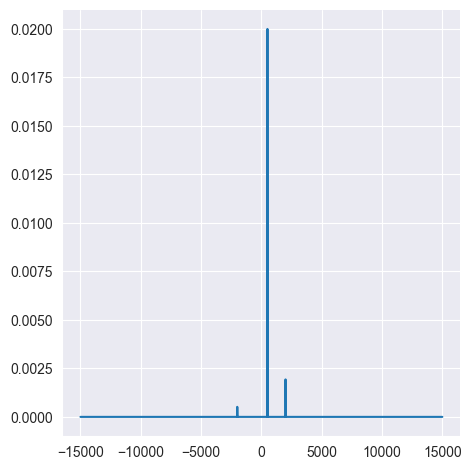

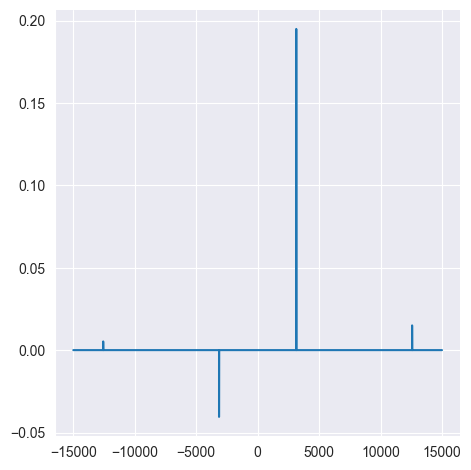

In [82]:
# Plot dirac delta function
x = np.arange(-15000, 15000, 1.0)

x = np.append(x, f_1 * 2 * np.pi)
x = np.append(x, -f_1 * 2 * np.pi)
x = np.append(x, f_2 * 2 * np.pi)
x = np.append(x, -f_2 * 2 * np.pi)

# Sort x
x = np.sort(x)

y_1 = [f(i) for i in x]
y_2 = [f_2_(i) for i in x]

sns.relplot(x=x, y=y_1, kind="line")
sns.relplot(x=x, y=y_2, kind="line")

In [71]:
f_1

500

In [53]:
round(2.01, 0)

2.0

In [77]:
f_2 * 2 * np.pi

12566.370614359172

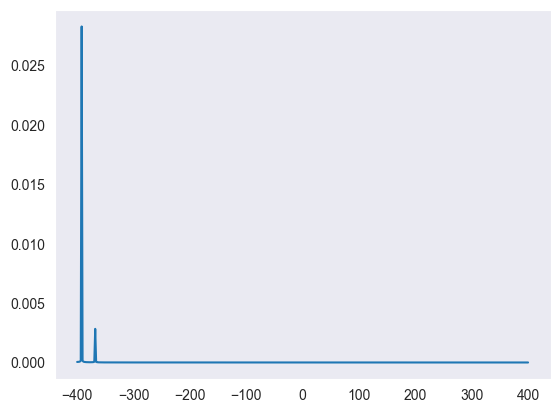

In [101]:
N = 1000 # Num samples
T = 1 / 800.0 # Sample spacing

def f(t):
    term_1 = A_1 * np.sin(2 * np.pi * f_1 * t + np.pi / 4)
    term_2 = A_2 * np.cos(2 * np.pi * f_2 * t + np.pi / 6)
    return term_1 + term_2

x = np.linspace(-5000, 5000, N)
y = [f(t) for t in x]

yf = fft(y)
xf = np.linspace(0, 1.0 / (2.0 * T), N // 2)

plt.plot(xf, 2.0 / N * np.abs(yf[0:N // 2]))
plt.grid()
plt.show()



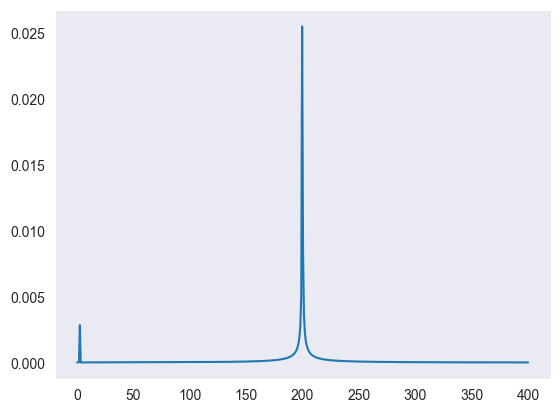

In [117]:
def f(t):
    term_1 = A_1 * np.sin((2 * np.pi * f_1 * t) + np.pi / 4)
    term_2 = A_2 * np.cos((2 * np.pi * f_2 * t) + np.pi / 6)
    return term_1 + term_2


In [ ]:
# Convert the dataframe to a numpy array
signal_bg = df_bg_mean["mean"].values
signal_wt = df_wt_mean["mean"].values

# Calculate the FFT of the signal with numpy
signal_fft_bg = np.fft.fft(signal_bg)
signal_fft_wt = np.fft.fft(signal_wt)

# Calculate the frequency axis
freq_bg = np.fft.fftfreq(signal_bg.size, d=1/sample_rate)
freq_wt = np.fft.fftfreq(signal_wt.size, d=1/sample_rate)

# Create new dataframe for FFT results (absolute value, only positive frequencies)
df_bg_fft = pd.DataFrame({"freq": freq_bg, "fft": np.abs(signal_fft_bg)})
df_bg_fft = df_bg_fft.loc[df_bg_fft["freq"] > 0]

df_wt_fft = pd.DataFrame({"freq": freq_wt, "fft": np.abs(signal_fft_wt)})
df_wt_fft = df_wt_fft.loc[df_wt_fft["freq"] > 0]